<a href="https://colab.research.google.com/github/Prasanth4ever/Sentiment_analysis/blob/main/Sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset Loaded Successfully!
Number of samples: 25000

Model Training Completed!

Accuracy: 0.8716

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.87      0.87      2482
           1       0.87      0.88      0.87      2518

    accuracy                           0.87      5000
   macro avg       0.87      0.87      0.87      5000
weighted avg       0.87      0.87      0.87      5000



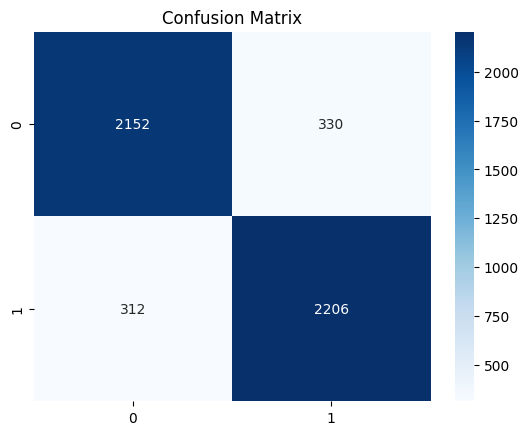


Test Prediction:
Enter a movie review (or type 'exit' to stop): this movie was good
Sentiment: Positive 😀
Enter a movie review (or type 'exit' to stop): it was worest
Sentiment: Positive 😀
Enter a movie review (or type 'exit' to stop): it was bad
Sentiment: Negative 😞
Enter a movie review (or type 'exit' to stop): it was worst
Sentiment: Negative 😞
Enter a movie review (or type 'exit' to stop): exit
Exiting sentiment analyzer. Goodbye!


In [3]:
# ---------------------------------------------------------
# SENTIMENT ANALYSIS PROJECT - GOOGLE COLAB READY
# ---------------------------------------------------------

# Install required libraries
# Colab already has most libraries. Install only if missing.
!pip install scikit-learn --quiet


# ---------------------------------------------------------
# IMPORTS
# ---------------------------------------------------------
import pandas as pd
import numpy as np
from sklearn.datasets import load_files
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import re

# ---------------------------------------------------------
# LOAD DATASET (IMDB MOVIE REVIEW – auto downloaded)
# ---------------------------------------------------------

!wget -q https://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz
!tar -xzf aclImdb_v1.tar.gz

reviews = load_files('aclImdb/train/', categories=['pos', 'neg'])
X, y = reviews.data, reviews.target

print("Dataset Loaded Successfully!")
print("Number of samples:", len(X))

# Convert bytes → string
X = [doc.decode("utf-8") for doc in X]

# ---------------------------------------------------------
# TEXT CLEANING FUNCTION
# ---------------------------------------------------------
def clean_text(text):
    text = re.sub(r'<.*?>', '', text)  # remove HTML tags
    text = re.sub(r'[^a-zA-Z]', ' ', text)  # keep letters only
    text = text.lower()
    return text

X_clean = [clean_text(t) for t in X]

# ---------------------------------------------------------
# TRAIN / TEST SPLIT
# ---------------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X_clean, y, test_size=0.2, random_state=42
)

# ---------------------------------------------------------
# TF-IDF VECTORIZATION
# ---------------------------------------------------------
vector = TfidfVectorizer(max_features=5000)
X_train_vec = vector.fit_transform(X_train)
X_test_vec = vector.transform(X_test)

# ---------------------------------------------------------
# MODEL TRAINING
# ---------------------------------------------------------
model = LogisticRegression(max_iter=1000)
model.fit(X_train_vec, y_train)

print("\nModel Training Completed!")

# ---------------------------------------------------------
# EVALUATION
# ---------------------------------------------------------
y_pred = model.predict(X_test_vec)

print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# CONFUSION MATRIX
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

# ---------------------------------------------------------
# CUSTOM PREDICTION FUNCTION
# ---------------------------------------------------------
def predict_sentiment(text):
    cleaned = clean_text(text)
    vect = vector.transform([cleaned])
    pred = model.predict(vect)[0]
    return "Positive 😀" if pred == 1 else "Negative 😞"

# TEST
print("\nTest Prediction:")
# ---------------------------------------------------------
# ASK USER FOR INPUT
# ---------------------------------------------------------
while True:
    user_text = input("Enter a movie review (or type 'exit' to stop): ")

    if user_text.lower() == "exit":
        print("Exiting sentiment analyzer. Goodbye!")
        break

    print("Sentiment:", predict_sentiment(user_text))

